In [3]:
%matplotlib inline  


## Survey Properties ##

baseIndexB = 16 # starting point for second set of questions

#base indices for each category of morality
harm = (1,7,12)
fairness = (2,8,13)
ingroup = (3,9,14)
authority = (4,10,15)
purity = (5,11,16)
moralQ = (harm, fairness, ingroup, authority, purity)
moralQ = {i:moralQ[i] for i in range(len(moralQ))}
specialQ = (6,)
names = ('harm', 'fairness', 'ingroup', 'authority', 'purity')
colors = ('r','y','c','b','k')
#names = {i:names[i] for i in range(len(names))}

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
df = pd.read_excel('mftq_1.xlsx',index_col=(0,))
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
id,,,,,,,,,,,,,,,,,,,,,
1,5,5,3,4,3,1,4.0,5,5,4,...,1,4,4,3,2,5,3,1,2,2
2,4,3,1,2,0,3,3.5,4,3,3,...,4,3,1,3,0,0,1,0,0,0
3,2,2,2,4,4,0,1.0,2,3,2,...,5,5,2,3,3,4,2,3,4,3
4,5,4,2,3,4,1,4.0,3,4,3,...,4,3,4,0,0,5,0,1,4,3
5,4,3,3,3,4,1,2.0,4,3,1,...,3,4,2,1,1,1,4,3,3,3


In [6]:
# start with zero scores
allScores = pd.DataFrame(np.zeros((df.shape[0],len(moralQ))),index=([i+1 for i in range(0,df.shape[0])]))

for morality in moralQ.keys():
    for col in moralQ[morality]:
        allScores[morality] = allScores[morality] + df[col] # page 1
        allScores[morality] = allScores[morality] + df[col+baseIndexB] # page 2
        
print(allScores)

      0   1   2   3   4
1  23.0  27  21  22  14
2  19.5  19  11  13   6
3  18.0  18  18  20  16
4  26.0  18  18  18  11
5  17.0  22  19  14  15


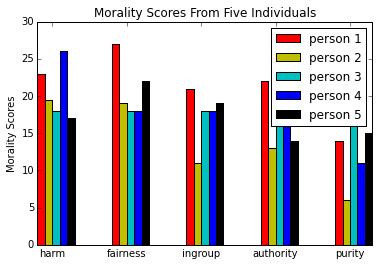

In [7]:
people = ['person ' + str(i) for i in allScores.index]
fig,ax = plt.subplots()
bars = []
width = 0.1
xpos = np.arange(df.shape[0])
i = 0
for ind in allScores.index:
    bars.append(ax.bar(xpos + width*i, allScores.loc[ind], width, color=colors[i]))
    i = i + 1
    
ax.set_ylabel('Morality Scores')
ax.set_title('Morality Scores From Five Individuals')
ax.set_xticks(xpos+width*np.mean(xpos))
ax.set_xticklabels(names)
ax.legend(bars, people)
plt.show()